# Name : Jabed Umar 
# Roll no : 2011072

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from Library.End import*
# from Library.Lin_alg import*
# from Library.Data_fit import*
from tqdm import trange
from scipy.optimize import curve_fit

# Q.1

In [56]:
#load the data from the file
t, N, sigma = np.loadtxt("endsemfit.txt").T

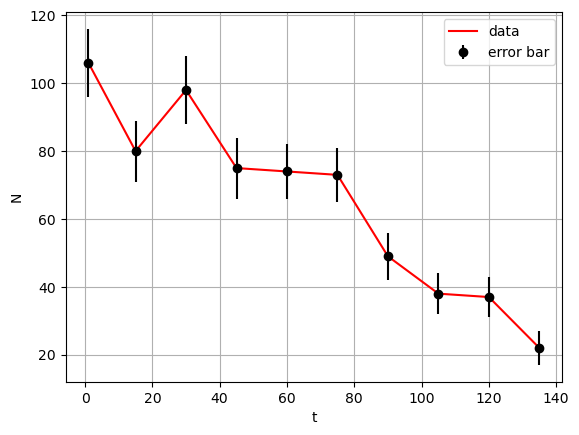

In [57]:
# plot t with N and var
plt.plot(t, N, label='data', color='red')
plt.errorbar(t, N, yerr=sigma, fmt='o', label = 'error bar', color='k')
plt.xlabel('t')
plt.ylabel('N')
plt.legend()
plt.grid()

In [75]:
#calling the polynomial_fit function
log_N0, lmda = polynomial_fit(-t, np.log(N), sigma, 1)[0]
# print(log_N0, lmda, sep='\n')
N0 = np.exp(log_N0)
print(f"Initial number of atoms: {N0:.0f}")
print(f"Decay constant (lambda): {lmda:.6f}")
print(f"error decay constant is {polynomial_fit(-t, np.log(N), sigma, 1)[1][3]:.6f}")

Initial number of atoms: 128
Decay constant (lambda): 0.011522
error decay constant is -0.012210


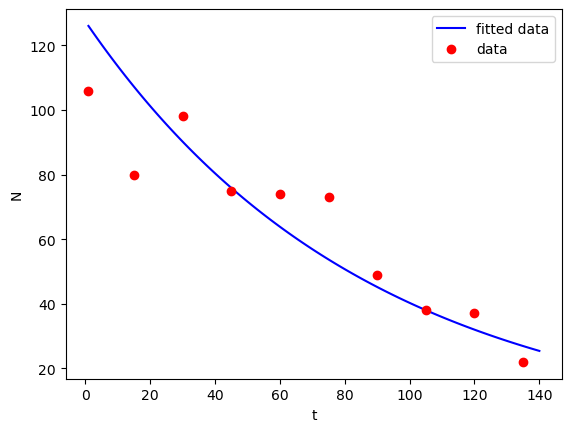

In [59]:
# plot the fit
plt.plot(np.linspace(1, 140, 100), N0*np.exp(-lmda*np.linspace(1, 140, 100)), label='fitted data', color='blue')
plt.plot(t, N, "o", label='data', color='red')
plt.xlabel('t')
plt.ylabel('N')
plt.legend()

In [43]:
E = N0*np.exp(-lmda*t)
O = N
diff_squared = (O - E)**2
chi_squares = diff_squared / E
chi_square = np.sum(chi_squares)
print(f"Chi-square value: {chi_square:.6f}")

Chi-square value: 21.312213


# <h5> The d.o.f = 10-1 = 9 and the obtained $\chi^2$ = 21.312213. But the critical value of the $\chi^2$ is 16.919 at 5 \% Level of significance. So, $\chi^2_{observed}$ >> $\chi^2_{critical}$ i.e we have to reject the hypothesis. 

# Q.2

In [44]:
#defining the trancted number function
def truncated_number(x, n):
    return int(x*10**n)/10**n

In [45]:
#defining the van der waals equation
def van_der_waals(x):
    return 5.95*x**3 - (5.95*0.05422 + 0.0821*300)*x**2 + 6.254*x - 6.254*0.05422

In [46]:
# R = RootFindings(van_der_waals, 0, 0.18, 0.00001,1000)
# #find the interval of the root
# R.bracket(5,1.5)

In [47]:
#define the parameters
P = 5.95
a = 6.254
b = 0.05422
R = 0.0821
T = 300
#define the functions
f1 = lambda x: R*T/(P + a/x**2) + b
f2 = lambda x: np.sqrt(a*(x-b)/(R*T - P*(x-b)))

#compute the fixed point iteration
root1 = fixed_point_iteration(f1, 0.1, max_it=100, tolerance=1e-5)
print("The root of the first function is: ", truncated_number(root1, 5))
print()
root2 = fixed_point_iteration(f2, 0.5, max_it=100, tolerance=1e-5)
print("The root of the second function is: ", truncated_number(root2, 5))

The root of the first function is:  0.07811

The root of the second function is:  0.18568


# Q.5

In [48]:
# Given matrix 
A = np.loadtxt("endsemmat.txt")
num_iterations = 100
eigenvalues = []
eigenvectors = []

#2 largest eigenvalues using power iteration
for _ in range(2):
    eigenvalue, eigenvector = Power_iteration(A, num_iterations)
    eigenvalues.append(eigenvalue)
    eigenvectors.append(eigenvector)
    A = A - eigenvalue * np.outer(eigenvector, eigenvector)

print("Eigenvalues:", eigenvalues)

Eigenvalues: [3.7320508075688767, 3.0]


In [49]:
# eigenvectors of the corresponding eigenvalues
for i, eigenvector in enumerate(eigenvectors):
    print(f"Eigenvector {i+1}:", eigenvector)

Eigenvector 1: [-0.28867513  0.5        -0.57735027  0.5        -0.28867513]
Eigenvector 2: [-5.00000000e-01  5.00000000e-01 -2.90760837e-10 -5.00000000e-01
  5.00000000e-01]


In [50]:
# Verify the given eigenvalues
a, b, c, n = -1, 2, -1, 5
L_1 = b + 2*np.sqrt(a*c)*np.cos(np.pi*1/(n+1))
L_2 = b + 2*np.sqrt(a*c)*np.cos(np.pi*2/(n+1))
print("The eigenvalues are: ", np.array([L_1, L_2]))

The eigenvalues are:  [3.73205081 3.        ]


In [51]:
#verify the given eigenvectors
v_1 = np.array([2*np.sqrt(c/a)*np.sin(np.pi*i/(n+1)) for i in range(1,n+1)])
#normalize the eigenvector v1
v_1 = v_1/np.linalg.norm(v_1)
v_2 = np.array([2*np.sqrt(c/a)**2*np.sin(2*np.pi*i/(n+1)) for i in range(1,n+1)])
#normalize the eigenvector v1
v_2 = v_2/np.linalg.norm(v_2)
print("The eigenvectors are: ", np.array([v_1, v_2]))

The eigenvectors are:  [[ 2.88675135e-01  5.00000000e-01  5.77350269e-01  5.00000000e-01
   2.88675135e-01]
 [ 5.00000000e-01  5.00000000e-01  7.07050159e-17 -5.00000000e-01
  -5.00000000e-01]]


# Q.6

Acceptance rate: 81.38%


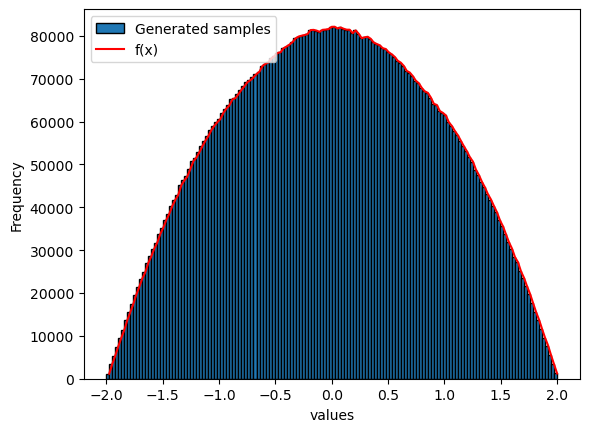

In [52]:
#The no of points
N = int(1e7)
a = 2
#standard deviation of g(x) distribution
g_std = 1.3
# define the functions
f = lambda x: 0.5 * (a**2 - x**2)
g = lambda x: np.exp(-x**2/(2*g_std**2)) * 0.5 * a**2
#scaling factor is there to make g(x) more than f(x) for all x

np.random.seed(15)  #choosing a seed
u = np.random.randn(N)*g_std  # generate N samples from g(x)
p = np.random.rand(N) # generate N samples from uniform distribution

#check if the samples are accepted or rejected
x = u[p < f(u)/g(u)] 

n = len(x)  # count accepted samples

print(f"Acceptance rate: {n*100/N:.2f}%")

a = plt.hist(x, bins=150,  edgecolor="k",label='Generated samples')
plt.plot(a[1][1:], a[0], 'r', label='f(x)')
plt.xlabel('values')
plt.ylabel('Frequency')
plt.legend()

# Q.7

Text(0, 0.5, 'Energy')

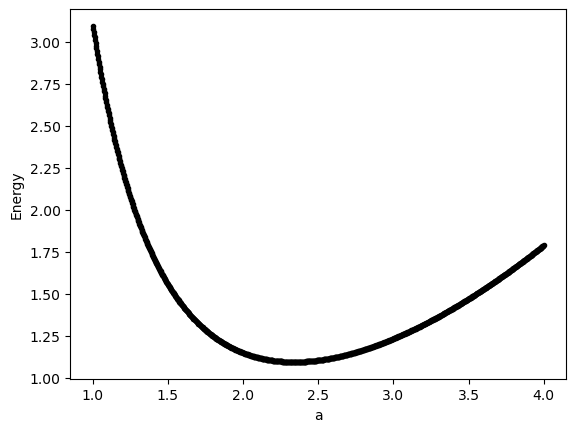

In [53]:
# variational method to solve the Harmonic Oscillator
# set the sampiling points
num_samples = int(1e5)

#set the values of alpha (a)
alphas = np.linspace(1, 4, 1000)
#initialize the array to store the energy values
ys = np.zeros_like(alphas)

#compute the energy values for each alpha
for i, alpha in enumerate(alphas):
    rands = get_rng_random(alpha, num_samples)
    eps = lambda x: 0.5*x**2 + 2/(alpha**2-x**2)
    integral = np.mean(eps(rands))
    ys[i] = integral

plt.plot(alphas, ys, ".-", color="black")
plt.xlabel('a') 
plt.ylabel('Energy')

In [54]:
optimal_alpha = np.argmin(ys)
print(f"Optimal a is : {alphas[optimal_alpha]:.4f}")
print(f"Minimum energy is: {ys[optimal_alpha]:.4f}")

Optimal a is : 2.3393
Minimum energy is: 1.0950


# <h4> We know that the ground state energy of the Harmonic Oscillator is 0.5 (in atomic unit). But we are getting 1.0950. This is because we are using the variational method to compute the energy and the trial wave function we are using is not the exact wave function. The exact wave function is a Gaussian type function (hermite polynomial). We can improve our result by using a Gaussian type trial wave function. </h4>